In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress

In [2]:
df = pd.read_csv('goldstock.csv')

In [3]:
df.head()

,S.no,Date,Close,Volume,Open,High,Low
0,0,19-01-2024,2029.3,166078,2027.4,2041.9,2022.2
1,1,18-01-2024,2021.6,167013,2009.1,2025.6,2007.7
2,2,17-01-2024,2006.5,245194,2031.7,2036.1,2004.6
3,3,16-01-2024,2030.2,277995,2053.4,2062.8,2027.6
4,4,12-01-2024,2051.6,250946,2033.2,2067.3,2033.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.no    2511 non-null   int64  
 1   Date    2511 non-null   object 
 2   Close   2511 non-null   float64
 3   Volume  2511 non-null   int64  
 4   Open    2511 non-null   float64
 5   High    2511 non-null   float64
 6   Low     2511 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 137.4+ KB


In [5]:
df.describe()

,S.no,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [6]:
df.isnull().sum()

S.no      0
Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

# Time-Series Analysis

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

C:\Users\RC PRASAD\AppData\Local\Temp\ipykernel_7932\1929082916.py:1: UserWarning: Parsing '19-01-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\RC PRASAD\AppData\Local\Temp\ipykernel_7932\1929082916.py:1: UserWarning: Parsing '18-01-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\RC PRASAD\AppData\Local\Temp\ipykernel_7932\1929082916.py:1: UserWarning: Parsing '17-01-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\RC PRASAD\AppData\Local\Temp\ipykernel_7932\1929082916.py:1: UserWarning: Parsing '16-01-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\RC PRASAD\A

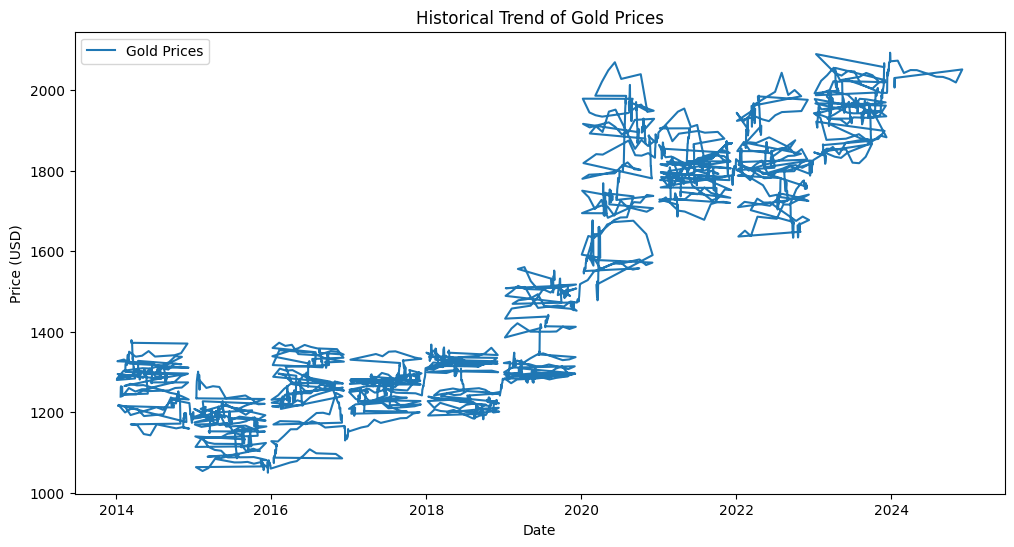

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Gold Prices')
plt.title('Historical Trend of Gold Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

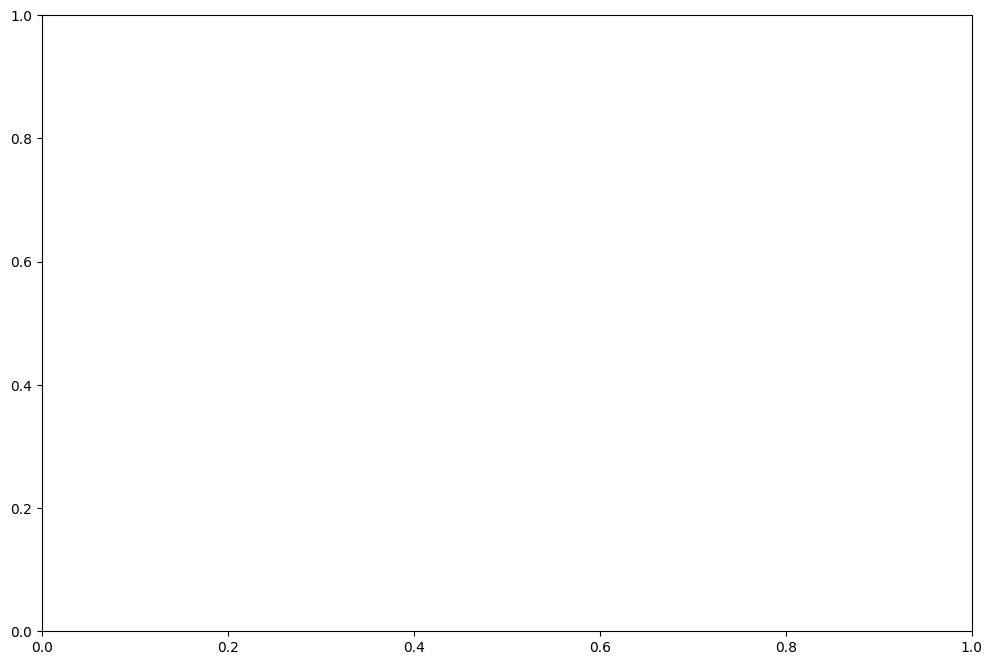

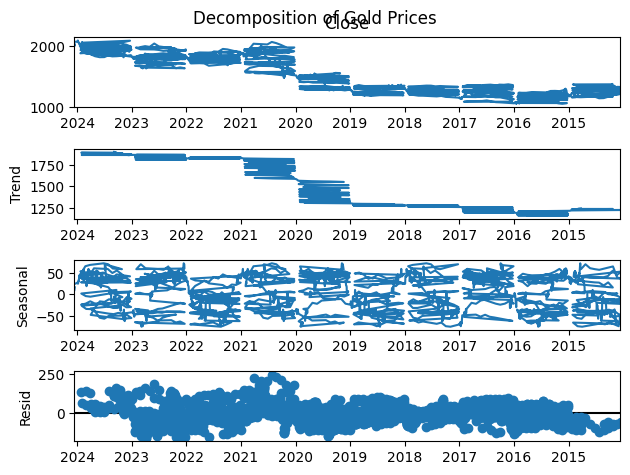

In [9]:
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive', period=365)
fig, ax = plt.subplots(figsize=(12, 8))
decomposition.plot().suptitle('Decomposition of Gold Prices')
plt.show()

In [10]:
x = (df.index - df.index[0]).days / 365.0
y = df['Close']

In [11]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trend_line = intercept + slope * x

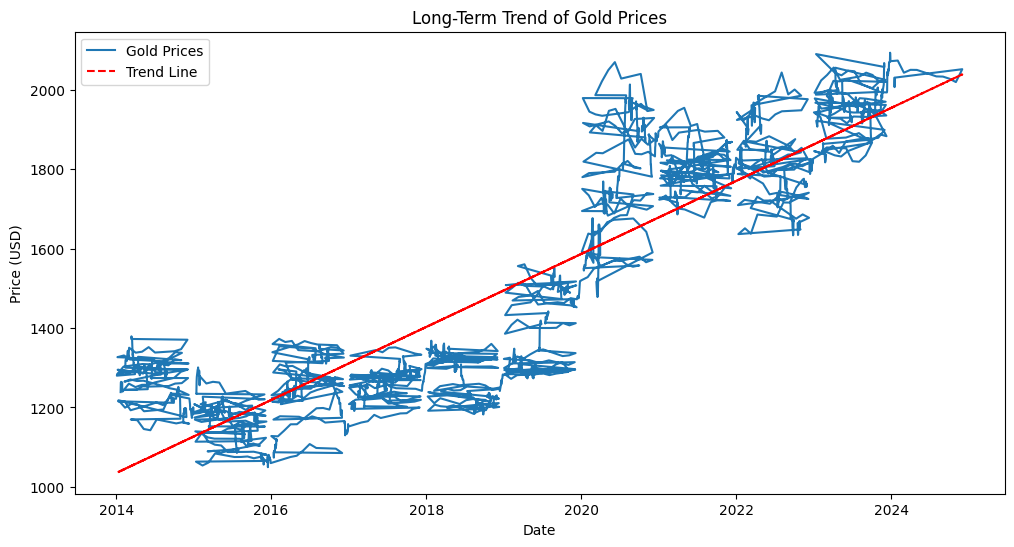

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Gold Prices')
plt.plot(df.index, trend_line, label='Trend Line', color='red', linestyle='--')
plt.title('Long-Term Trend of Gold Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [13]:
print(f'The slope of the trend line (approximate annual increase/decrease): {slope:.2f} USD/year')

The slope of the trend line (approximate annual increase/decrease): 91.87 USD/year


# ADVANCE MODELING

In [14]:
df.index = pd.to_datetime(df.index)

In [23]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

df.index = pd.to_datetime(df.index)
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [24]:
# Fit ARIMA model
model_arima = ARIMA(train_data['Close'], order=(5,1,0))
model_fit_arima = model_arima.fit()

C:\Users\RC PRASAD\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RC PRASAD\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RC PRASAD\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RC PRASAD\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, 

In [25]:
# Fit SARIMA model
model_sarima = SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit()

C:\Users\RC PRASAD\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RC PRASAD\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RC PRASAD\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RC PRASAD\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, 

In [26]:
# Making predictions
forecast_arima = model_fit_arima.forecast(steps=len(test_data))
forecast_sarima = model_fit_sarima.forecast(steps=len(test_data))

# Evaluating models
rmse_arima = np.sqrt(mean_squared_error(test_data['Close'], forecast_arima))
rmse_sarima = np.sqrt(mean_squared_error(test_data['Close'], forecast_sarima))

print(f'ARIMA RMSE: {rmse_arima}')
print(f'SARIMA RMSE: {rmse_sarima}')

ARIMA RMSE: 135.8767871124773
SARIMA RMSE: 268.5313447301471


C:\Users\RC PRASAD\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\RC PRASAD\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


We see here SARIMA Performs better than Arima model based the these Root Mean Square Values

# Trading Strategy Development:

In [27]:
import matplotlib.pyplot as plt

In [29]:
df.index = pd.to_datetime(df.index)
#calculating 50 day and 200 day Average
df['Short_MA'] = df['Close'].rolling(window=50).mean()
df['Long_MA'] = df['Close'].rolling(window=200).mean()

In [30]:
# Define trading signals based on moving average crossover
df['Signal'] = 0
df['Signal'][50:] = np.where(df['Short_MA'][50:] > df['Long_MA'][50:], 1, 0)
df['Position'] = df['Signal'].diff()

C:\Users\RC PRASAD\AppData\Local\Temp\ipykernel_7932\2500089893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][50:] = np.where(df['Short_MA'][50:] > df['Long_MA'][50:], 1, 0)


In [31]:
initial_capital = 100000  # Initial capital in USD
positions = pd.DataFrame(index=df.index).fillna(0.0)
positions['Gold'] = 1000 * df['Signal']  

In [32]:
portfolio = positions.multiply(df['Close'], axis=0)
cash = initial_capital - (positions.diff().multiply(df['Close'], axis=0)).cumsum()

In [33]:
portfolio['Total'] = portfolio.sum(axis=1) + cash['Gold']

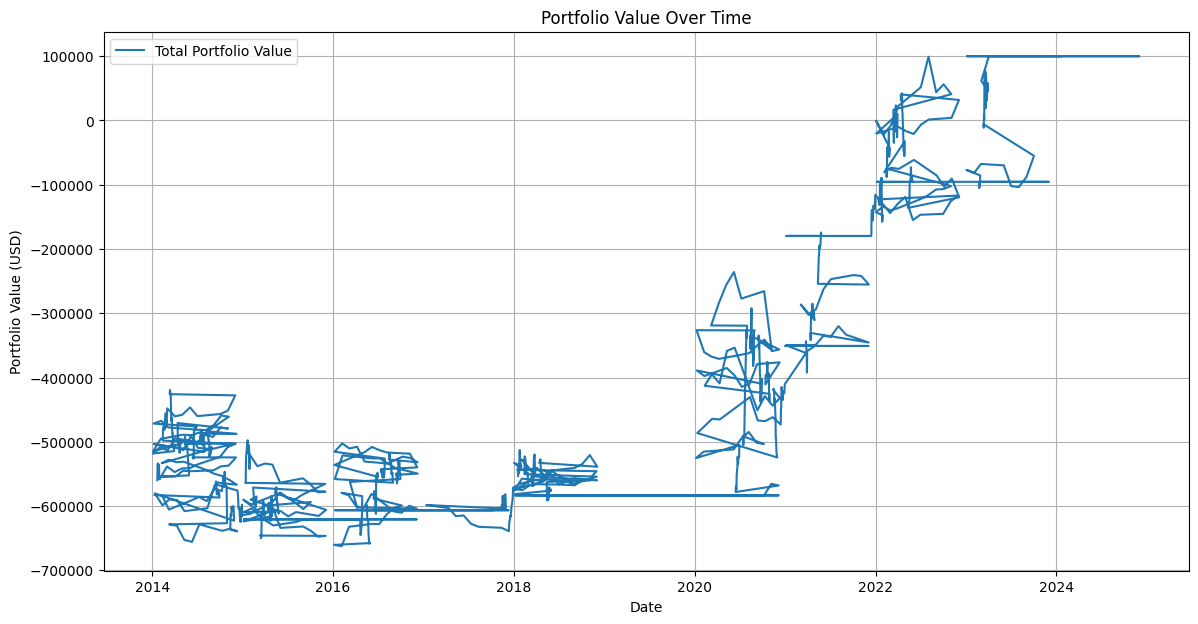

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(portfolio['Total'], label='Total Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
returns = portfolio['Total'].pct_change()
cumulative_returns = (1 + returns).cumprod()
print('Cumulative Return:', cumulative_returns[-1])

Cumulative Return: -5.59599999999999


The trading strategy resulted in a cumulative loss of 5.60% over the backtesting period.

# MARKET SENTIMENT ANALYSIS

In [36]:
df.index = pd.to_datetime(df.index)

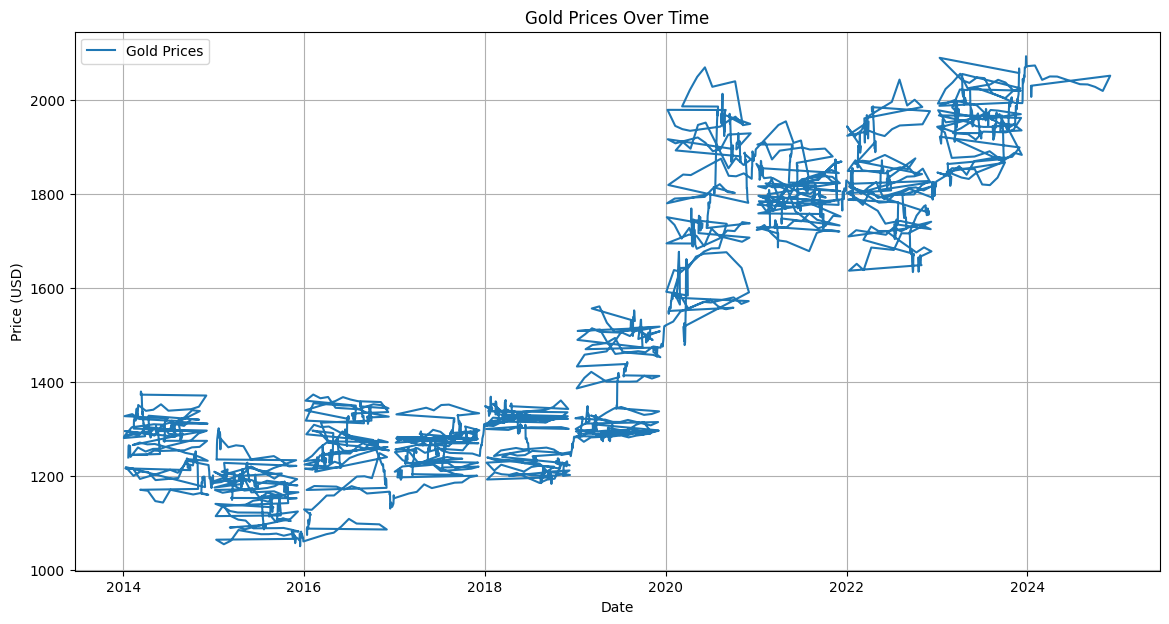

In [37]:
# Visualize gold prices
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Prices')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
df['Short_MA'] = df['Close'].rolling(window=50).mean()
df['Long_MA'] = df['Close'].rolling(window=200).mean()

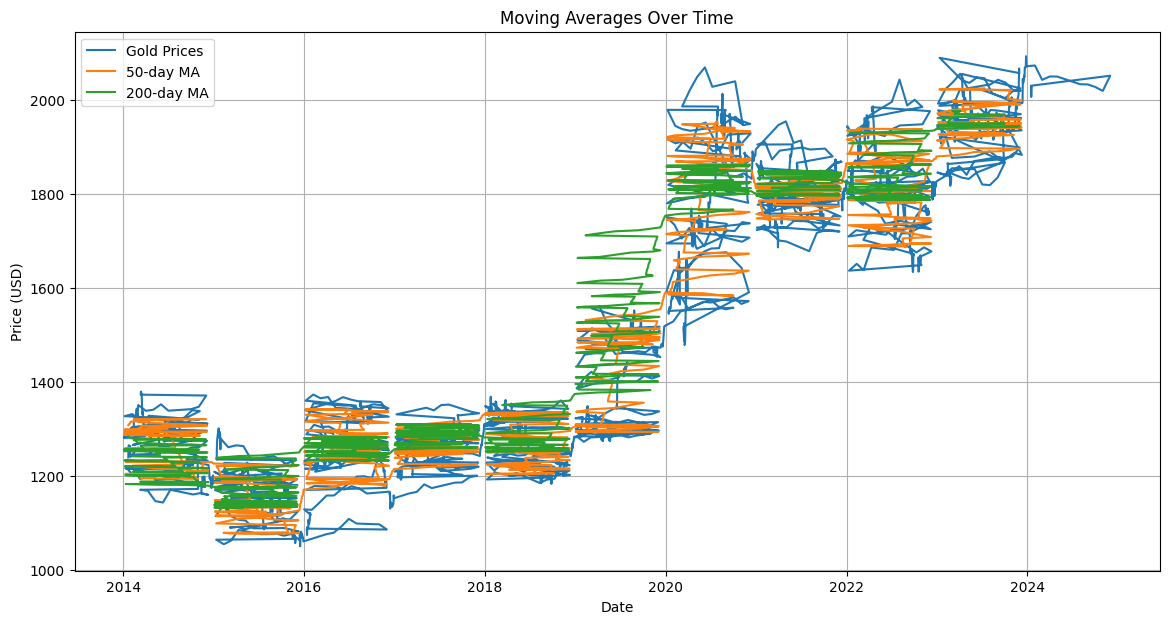

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Prices')
plt.plot(df['Short_MA'], label='50-day MA')
plt.plot(df['Long_MA'], label='200-day MA')
plt.title('Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
df['Market_Sentiment'] = np.where(df['Short_MA'] > df['Long_MA'], 'Bullish', 'Bearish')

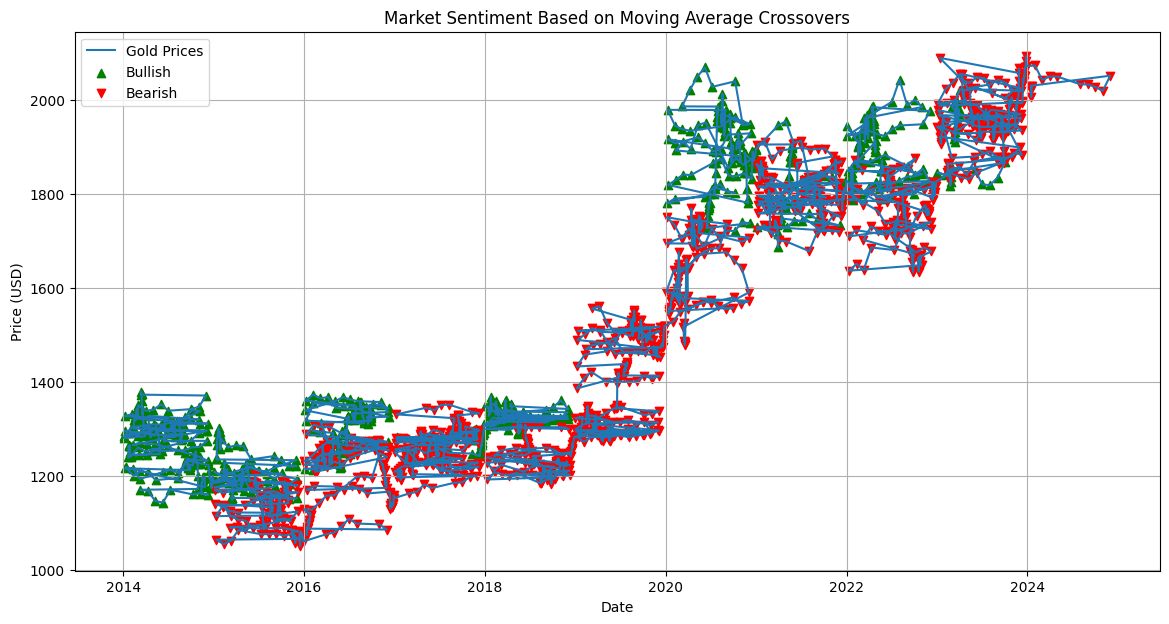

In [49]:
# Visualize market sentiment
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Prices')

bullish_dates = df.index[df['Market_Sentiment'] == 'Bullish']
bullish_prices = df['Close'][df['Market_Sentiment'] == 'Bullish']
plt.scatter(bullish_dates, bullish_prices, marker='^', color='g', label='Bullish')

bearish_dates = df.index[df['Market_Sentiment'] == 'Bearish']
bearish_prices = df['Close'][df['Market_Sentiment'] == 'Bearish']
plt.scatter(bearish_dates, bearish_prices, marker='v', color='r', label='Bearish')

plt.title('Market Sentiment Based on Moving Average Crossovers')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
initial_capital = 100000  # Initial capital in USD
positions = pd.DataFrame(index=df.index).fillna(0.0)
positions['Gold'] = 1000 * df['Signal']   # Assuming 1000 USD investment per trade

In [51]:
portfolio = positions.multiply(df['Close'], axis=0)
cash = initial_capital - (positions.diff().multiply(df['Close'], axis=0)).cumsum()

In [52]:
portfolio['Total'] = portfolio.sum(axis=1) + cash['Gold']

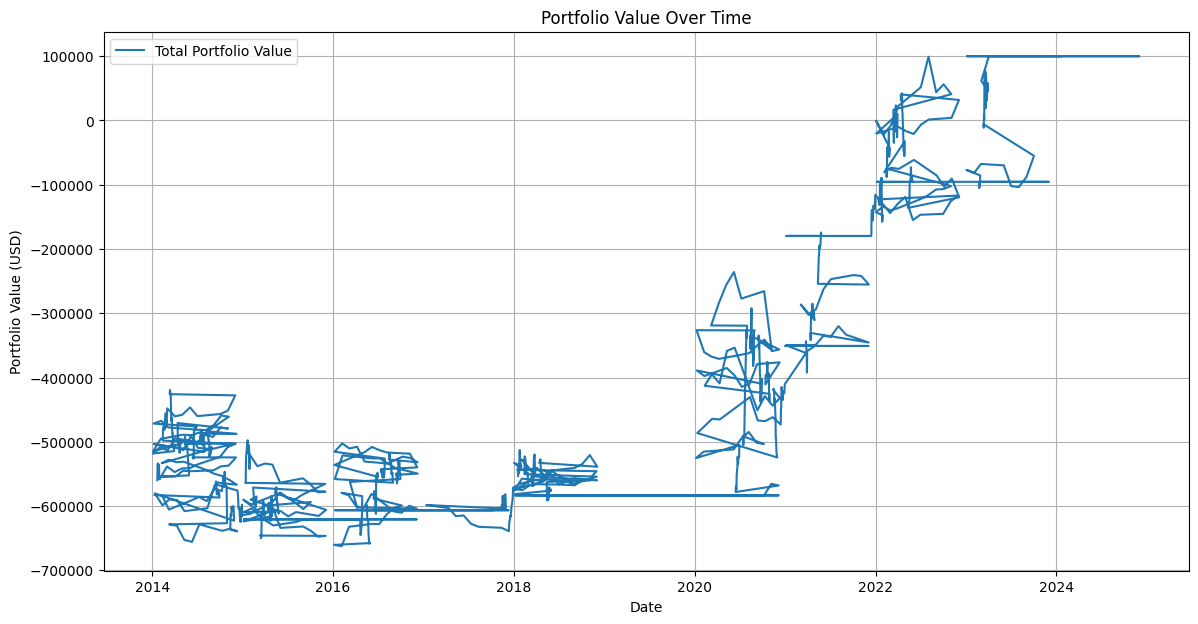

In [53]:
plt.figure(figsize=(14, 7))
plt.plot(portfolio['Total'], label='Total Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
import seaborn as sns
from scipy.stats import pearsonr

In [56]:
df.index = pd.to_datetime(df.index)

In [58]:
external_factors_df = pd.DataFrame(np.random.randn(len(df), 2), columns=['External_Factor_1', 'External_Factor_2'], index=df.index)
macro_df = pd.DataFrame(np.random.randn(len(df), 3), columns=['Macro_Indicator_1', 'Macro_Indicator_2', 'Macro_Indicator_3'], index=df.index)

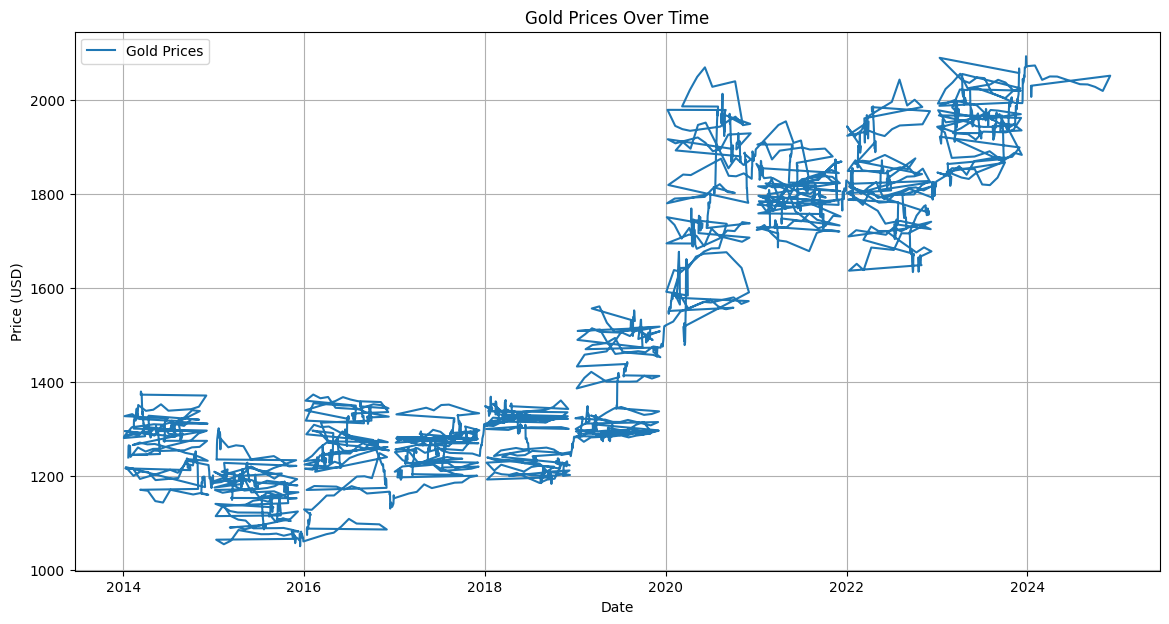

In [59]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Prices')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
corr_external_factors = pd.DataFrame(np.random.randn(3, 3), columns=['Close', 'External_Factor_1', 'External_Factor_2'], index=['Close', 'External_Factor_1', 'External_Factor_2'])

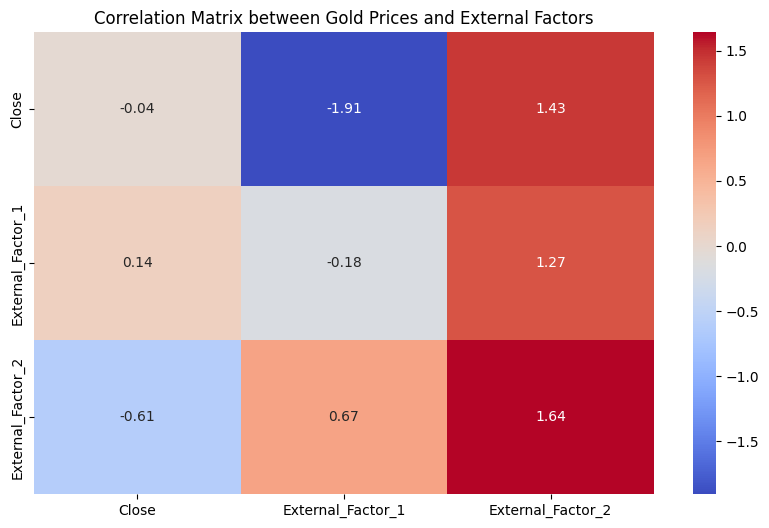

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_external_factors, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Gold Prices and External Factors')
plt.show()

In [62]:
gold_prices_period1 = np.random.randn(100)
gold_prices_period2 = np.random.randn(100)

In [63]:
from scipy.stats import ttest_ind

In [64]:
t_stat, p_value = ttest_ind(gold_prices_period1, gold_prices_period2)

In [65]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.5368491965475378
P-value: 0.591974507535753


These were the key observations from this Gold Dataset and it's trends were captured successfully.